In [1]:
import os, sys, glob
from datetime import datetime
sys.path.insert(0,'/home/wu-jung/code_git/mi-instrument')

from mi.instrument.kut.ek60.ooicore.zplsc_b import *
from concat_raw import *

data_path = '/media/wu-jung/wjlee_apl_2/ooi_zplsc_600m/'
fname_form = 'OOI-D20150910-T*.raw'  # index all files in 2015
fname_all = glob.glob(os.path.join(data_path,fname_form))
fname_all

['/media/wu-jung/wjlee_apl_2/ooi_zplsc_600m/OOI-D20150910-T000000.raw']

In [2]:
particle_data, data_times, power_data_dict, freq, bin_size, config_header, config_transducer = parse_echogram_file(fname_all[0])

2017-09-12 14:02:49,066 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Begin processing echogram data: '/media/wu-jung/wjlee_apl_2/ooi_zplsc_600m/OOI-D20150910-T000000.raw'


In [3]:
data_mtx = get_data_mtx(power_data_dict,freq)

In [4]:
power_data_dict[3].shape

(1046, 28725)

In [5]:
data_mtx.shape

(3, 1046, 28725)

In [6]:
particle_data

(defaultdict(list,
             {'filepath': 'OOI-D20150910-T000000.png',
              'zplsc_absorption_coeff': [0.037440311,
               0.0097852694,
               0.052687589],
              'zplsc_bandwidth': [3026.3916, 2425.1497, 3088.4004],
              'zplsc_channel': [1, 2, 3],
              'zplsc_frequency': [120000.0, 38000.0, 200000.0],
              'zplsc_pulse_length': [0.001024, 0.001024, 0.001024],
              'zplsc_sample_interval': [0.000256, 0.000256, 0.000256],
              'zplsc_sound_velocity': [1493.8888, 1493.8888, 1493.8888],
              'zplsc_temperature': [10.0, 10.0, 10.0],
              'zplsc_timestamp': '20150910000000',
              'zplsc_transducer_depth': [0.0, 0.0, 0.0],
              'zplsc_transmit_power': [250.0, 500.0, 150.0]}),
 3650832000.0861511)

In [7]:
config_header

{'sounder_name': 'ER60',
 'survey_name': 'OOI',
 'transducer_count': 3,
 'transect_name': '',
 'version': '2.4.3'}

In [8]:
config_transducer

[{'angle_offset_alongship': 0.0,
  'angle_offset_athwart': 0.0,
  'angle_sensitivity_alongship': 23.0,
  'angle_sensitivity_athwartship': 23.0,
  'beam_type': 1,
  'beam_width_alongship': 7.0,
  'beam_width_athwartship': 7.0,
  'channel_id': 'GPT 120 kHz 00907208a0b1 3-1 ES120-7CD',
  'dir_x': 0.0,
  'dir_y': 0.0,
  'dir_z': 0.0,
  'equiv_beam_angle': -20.700000762939453,
  'frequency': 120000.0,
  'gain': 25.0,
  'gain_table': array([ 23.5       ,  24.79999924,  25.        ,  25.        ,  25.        ]),
  'gpt_software_version': '070413',
  'pos_x': 0.0,
  'pos_y': 0.0,
  'pos_z': 0.0,
  'pulse_length_table': array([  6.39999998e-05,   1.28000000e-04,   2.55999999e-04,
           5.11999999e-04,   1.02400000e-03]),
  'sa_correction_table': array([ 0.,  0.,  0.,  0.,  0.])},
 {'angle_offset_alongship': 0.0,
  'angle_offset_athwart': 0.0,
  'angle_sensitivity_alongship': 21.899999618530273,
  'angle_sensitivity_athwartship': 21.899999618530273,
  'beam_type': 0,
  'beam_width_alongship

In [9]:
particle_data[0]['zplsc_sound_velocity'][0]

1493.8888

In [10]:
cal_params = get_cal_params(power_data_dict,particle_data,config_header,config_transducer)

In [11]:
cal_params

[{'absorptioncoefficient': 0.037440311,
  'angleoffsetathwartship': 0.0,
  'anglesensitivityalongship': 23.0,
  'anglesensitivityathwartship': 23.0,
  'anglesoffsetalongship': 0.0,
  'equivalentbeamangle': -20.700000762939453,
  'frequency': 120000.0,
  'gain': 25.0,
  'gaintable': array([ 23.5       ,  24.79999924,  25.        ,  25.        ,  25.        ]),
  'pulselength': 0.001024,
  'pulselengthtable': array([  6.39999998e-05,   1.28000000e-04,   2.55999999e-04,
           5.11999999e-04,   1.02400000e-03]),
  'sacorrectiontable': array([ 0.,  0.,  0.,  0.,  0.]),
  'sampleinterval': 0.000256,
  'soundername': 'ER60',
  'soundvelocity': 1493.8888,
  'transducerdepth': 0.0,
  'transmitpower': 250.0},
 {'absorptioncoefficient': 0.0097852694,
  'angleoffsetathwartship': 0.0,
  'anglesensitivityalongship': 21.899999618530273,
  'anglesensitivityathwartship': 21.899999618530273,
  'anglesoffsetalongship': 0.0,
  'equivalentbeamangle': -20.600000381469727,
  'frequency': 38000.0,
  'gai

In [12]:
tvgCorrectionFactor = 2.0

In [13]:
import numpy.matlib

In [14]:
n=0

In [15]:
        Sv_old={}
        f = cal_params[n]['frequency']
        c = cal_params[n]['soundvelocity']
        t = cal_params[n]['sampleinterval']
        alpha = cal_params[n]['absorptioncoefficient']
        G = cal_params[n]['gain']
        phi = cal_params[n]['equivalentbeamangle']
        pt = cal_params[n]['transmitpower']
        tau = cal_params[n]['pulselength']

        dR = c*t/2   # sample thickness
        wvlen = c/f  # wavelength

        # Calc gains
        CSv = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2 * c * tau * 10**(phi/10)) / (32 * np.pi**2))
        CSp = 10 * np.log10((pt * (10**(G/10))**2 * wvlen**2) / (16 * np.pi**2))

        # calculate Sa Correction
        idx = [i for i,dd in enumerate(cal_params[n]['pulselengthtable']) if dd==tau]
        Sac = 2 * cal_params[n]['sacorrectiontable'][idx]

        # determine number of samples in array
        pSize = power_data_dict[n+1].shape   # size(data.pings(n).power);

        # create range vector (in m)
        range_vec = np.arange(pSize[0]) * dR
            # data.pings(n).range = double((0:pSize(1) - 1) + ...
            #    double(data.pings(n).samplerange(1)) - 1)' * dR;

        # apply TVG Range correction -
        rangeCorrected = range_vec - (tvgCorrectionFactor * dR)
        rangeCorrected[rangeCorrected<0] = 0
            # rangeCorrected = data.pings(n).range - (tvgCorrectionFactor * dR);
            # rangeCorrected(rangeCorrected < 0) = 0;

        # update sound speed and absorption coefficient  **** Chu 4/2/2010 ****
        # data.pings(n).absorptioncoefficient(:) = alpha;
        # data.pings(n).soundvelocity(:) = c;

        # Calculate Sv TVG vector - ignore imag components of TVG
        idx_inf = rangeCorrected!=0
        TVG = np.empty(rangeCorrected.shape)
        TVG[rangeCorrected!=0] = np.real( 20*np.log10(rangeCorrected[rangeCorrected!=0]) )  # TVG = real(20 * log10(rangeCorrected));
        TVG[rangeCorrected==0] = 0
        # TVG = real(20 * log10(rangeCorrected));

        Sv_old[n+1] = power_data_dict[n+1] + np.transpose(np.matlib.repmat(TVG,pSize[1],1)) +\
             2*cal_params[n]['absorptioncoefficient']*np.transpose(np.matlib.repmat(rangeCorrected,pSize[1],1)) - CSv - Sac
        Sv_old[n+1] = Sv_old[n+1][::-1]

In [16]:
A=np.transpose(np.matlib.repmat(TVG,pSize[1],1))
A.shape

(1046, 28725)

In [17]:
B=2*cal_params[n]['absorptioncoefficient']*np.transpose(np.matlib.repmat(rangeCorrected,pSize[1],1))
B.shape

(1046, 28725)

In [18]:
%matplotlib inline

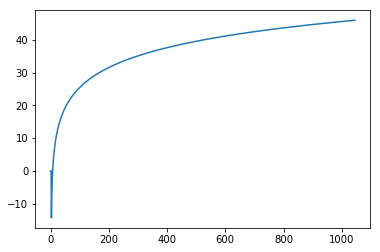

In [19]:
plt.plot(TVG)

In [20]:
        Sv_new = (power_data_dict[n+1].T \
                   +TVG +2*cal_params[n]['absorptioncoefficient']*rangeCorrected\
                   -CSv -Sac).T
        Sv_new = Sv_new[::-1]

In [21]:
power_data_dict[n+1].shape

(1046, 28725)

In [22]:
TVG.shape

(1046,)

In [23]:
rangeCorrected.shape

(1046,)

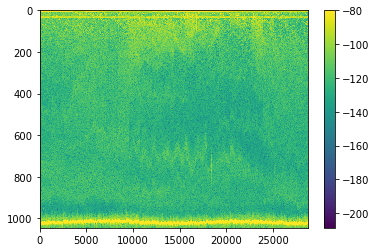

In [24]:
plt.imshow(power_data_dict[1],aspect='auto',vmin=power_data_dict[1].min(),vmax=-80)
plt.colorbar()

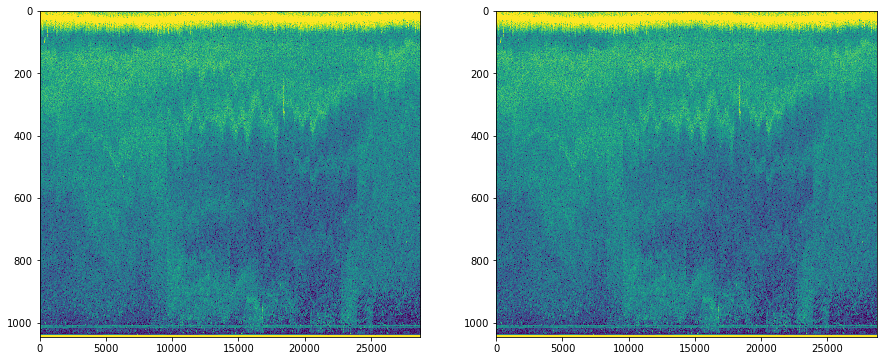

In [25]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(6)
ax[0].imshow(Sv_old[1],aspect='auto',vmin=-100,vmax=-30)
ax[1].imshow(Sv_new,aspect='auto',vmin=-100,vmax=-30)

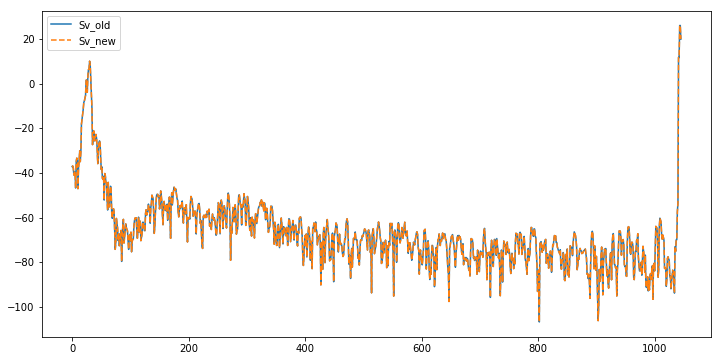

In [35]:
plt.figure(figsize=[12,6])
plt.plot(Sv_old[1][:,10],label='Sv_old')
plt.plot(Sv_new[:,10],'--',label='Sv_new')
plt.legend()

In [26]:
Sv_fcn = power2Sv(power_data_dict,cal_params)  # convert from power to Sv

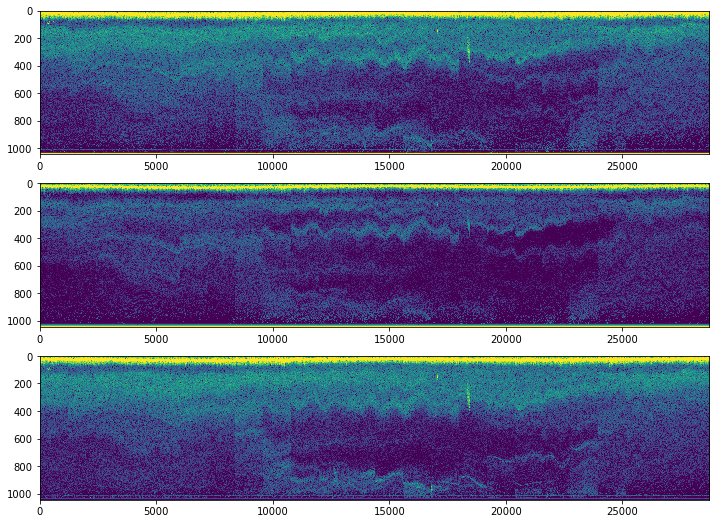

In [27]:
fig,ax = plt.subplots(3,1)
fig.set_figwidth(12)
fig.set_figheight(9)
ax[0].imshow(Sv_fcn[1],aspect='auto',vmin=-80,vmax=-30)
ax[1].imshow(Sv_fcn[2],aspect='auto',vmin=-80,vmax=-30)
ax[2].imshow(Sv_fcn[3],aspect='auto',vmin=-80,vmax=-30)